In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

## Loading the Dataset

In [2]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train=x_train.reshape(-1, 28, 28, 1)
x_test=x_test.reshape(-1, 28, 28, 1)

In [5]:
x_test.shape

(10000, 28, 28, 1)

## Normalizing the data

In [6]:
x_train=x_train/255
x_test=x_test/255

## Building a CNN 

In [7]:
cnn=keras.Sequential([
    #cnn layers
    keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)),
    keras.layers.MaxPool2D((2,2)),
    
    keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    
    keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    
    #Dense Layers
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

cnn.compile(optimizer="adam",
           loss="sparse_categorical_crossentropy",
            metrics=["accuracy"]
           )

In [8]:
cnn.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2050 - accuracy: 0.9362 - val_loss: 0.0695 - val_accuracy: 0.9790
Epoch 2/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0705 - accuracy: 0.9784 - val_loss: 0.0666 - val_accuracy: 0.9780
Epoch 3/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0498 - accuracy: 0.9844 - val_loss: 0.0535 - val_accuracy: 0.9839
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0380 - accuracy: 0.9881 - val_loss: 0.0540 - val_accuracy: 0.9839
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0314 - accuracy: 0.9902 - val_loss: 0.0452 - val_accuracy: 0.9871
Epoch 6/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0253 - accuracy: 0.9918 - val_loss: 0.0452 - val_accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0219 - accuracy: 0.9934 - val_loss: 0.0442 -

In [9]:
y_pred= cnn.predict(x_test)
y_pred

array([[3.3372605e-09, 1.4686148e-06, 6.0897793e-05, ..., 9.9993563e-01,
        1.0668968e-09, 1.7528187e-06],
       [7.5187034e-10, 4.1874715e-10, 1.0000000e+00, ..., 2.3798044e-10,
        1.5875170e-12, 1.9821928e-12],
       [2.3298388e-09, 9.9999940e-01, 1.1971819e-09, ..., 2.9138852e-07,
        9.9353139e-09, 4.8540043e-09],
       ...,
       [1.6873929e-17, 1.1602472e-13, 2.3811116e-18, ..., 4.6048347e-12,
        3.7475429e-11, 2.0560992e-10],
       [6.8920048e-07, 4.3299864e-10, 2.4907360e-10, ..., 7.6705697e-11,
        1.2592932e-06, 3.2704207e-07],
       [1.1529558e-10, 7.8638729e-14, 1.2181055e-10, ..., 2.8590948e-18,
        3.1619851e-10, 3.2755597e-12]], dtype=float32)

In [10]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0516 - accuracy: 0.9889


[0.05157487094402313, 0.9889000058174133]

In [11]:
y_pred_classes=[]
for el in y_pred:
    y_pred_classes.append(np.argmax(el))

In [12]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [13]:
y_pred_classes[:5]

[7, 2, 1, 0, 4]

In [14]:
cnn.save("mnist_conv_model.h5")

Matplotlib is building the font cache; this may take a moment.


Confusion_matrix:  tf.Tensor(
[[ 966    2    1    0    0    1    6    3    0    1]
 [   0 1133    0    1    0    0    0    1    0    0]
 [   1    0 1020    1    0    0    1    8    1    0]
 [   0    0    8  997    0    2    0    2    1    0]
 [   0    0    0    0  977    0    1    1    0    3]
 [   2    0    1    4    0  881    2    1    1    0]
 [   2    6    0    0    1    1  946    0    2    0]
 [   0    4    8    0    1    1    0 1012    2    0]
 [   2    0    1    0    1    0    0    1  964    5]
 [   0    0    1    0    4    4    1    5    1  993]], shape=(10, 10), dtype=int32)


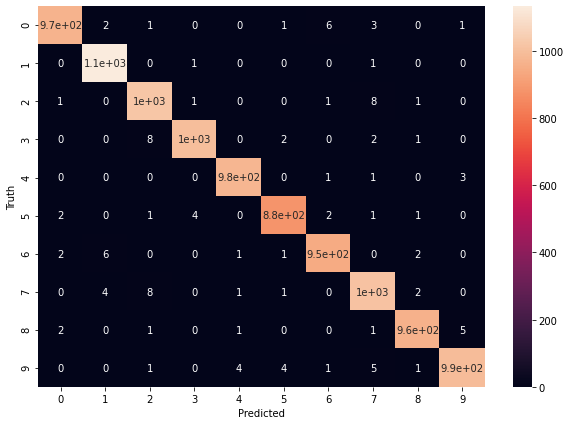

In [16]:
labels = y_test[:]
predictions = y_pred_classes[:] 

res = tf.math.confusion_matrix(labels,predictions)

import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sn.heatmap(res, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

print('Confusion_matrix: ',res)